# Sequence Networks

By using the `SequenceNetwork` class of pyeed, sequences can be visualized and analyzed in a network representation. The idea between the network representation is to represent individual sequences as nodes and the relationship between sequences as edges, building the network structure. The relationship between the sequences can be mainly parameterized in to ways: (1) the existence of an edge between two sequences, and (2) the weight assigned to the edge between two sequences. The weight of the edges is calculated by performing a pairwise alignment between the sequences, whereas the identity of the sequences is used to parameterize the weight of the edges. The identity of the sequences is calculated by the number of identical characters between the sequences divided by the length of the sequences.  
Furthermore, the `threshold` defining the minimum identity between two sequences to be considered as an edge can be adjusted. Thus favouring the buildup regions in the network with higher identity.

In [1]:
%reload_ext autoreload
%autoreload 2
import json
from pyeed.core import ProteinRecord
from pyeed.network import SequenceNetwork

In [2]:
# load ids
with open("ids.json", "r") as f:
    ids = json.load(f)

# load sequences
sequences = ProteinRecord.get_ids(ids)

Output()

The network is created by instantiating the `SequenceNetwork` class and providing the sequences as a list of `ProteinRecord` objects. By using the `update_threshold` method, the threshold can be adjusted.  

The network can be visualized by using the `visualize()` method. The method allows to colorize the sequences by the different taxonomic classes. The IDs of the sequences can be added to the plot by setting `label` to `True`. The network can be saved as a PNG specifying the `save_path`.

In [3]:
# create the network
graph = SequenceNetwork(sequences=sequences)
graph.update_threshhold(0.4)

# plot the network
graph.visualize(color="domain")

{'@id': 'Q97CT6', 'name': 'S-adenosylmethionine synthase', 'organism': {'@id': '9e4910fd-a3c7-46f1-bb92-e779b0ec6715', 'taxonomy_id': 273116, 'name': 'Thermoplasma volcanium GSS1', 'domain': 'Archaea', 'phylum': 'Candidatus Thermoplasmatota', 'tax_class': 'Thermoplasmata', 'order': 'Thermoplasmatales', 'family': 'Thermoplasmataceae', 'genus': 'Thermoplasma', '@type': ['Organism'], '@context': {'Organism': 'https://github.com/PyEED/pyeed/Organism', 'taxonomy_id': 'http://edamontology.org/data_1179', 'name': 'http://edamontology.org/data_2909', 'kingdom': 'http://edamontology.org/data_1044', 'family': 'http://edamontology.org/data_2732', 'genus': 'http://edamontology.org/data_1870', 'species': 'http://edamontology.org/data_1045'}}, 'sequence': 'MERNISVEELNQIPTPKKEVEIVERKGIGHPDSVADGIAEAVSRSLSKYYLEHYGRILHHNTDQVEVVGGQSAPKYGGGLVLEPTYILLSGRATTKVGNDRVPYKSITIKAAKDYLRNNFSHLDVDADVMIDSRIGQGSVDLVEVYDTSKLEANDTSFGVGFAPLSETENIVLKTERYLNGSLKKKLPMVGYDIKVMGFRQKDTINLTVAAAFVDKYIKDADEYFNLKDQLKDLVLDNAVEETDKEV

KeyError: 'id'

A central analysis method of networks is the calculation of the centrality of the nodes. The centrality of a node is a measure of the importance of a node in the network. The centrality of a node can be calculated by using the `calculate_centrality` method of the `SequenceNetwork` object. Thereby, different kinds of centrality namely `degree`, `closeness`, `betweenness`, and `eigenvector` centrality can be calculated.

The network itself is represented as a [`networkx`](https://networkx.org/documentation/stable/index.html) graph object, which allows for a wide range of network analysis and visualization methods. The network object can be accessed by the `network` attribute of the `SequenceNetwork` object.  



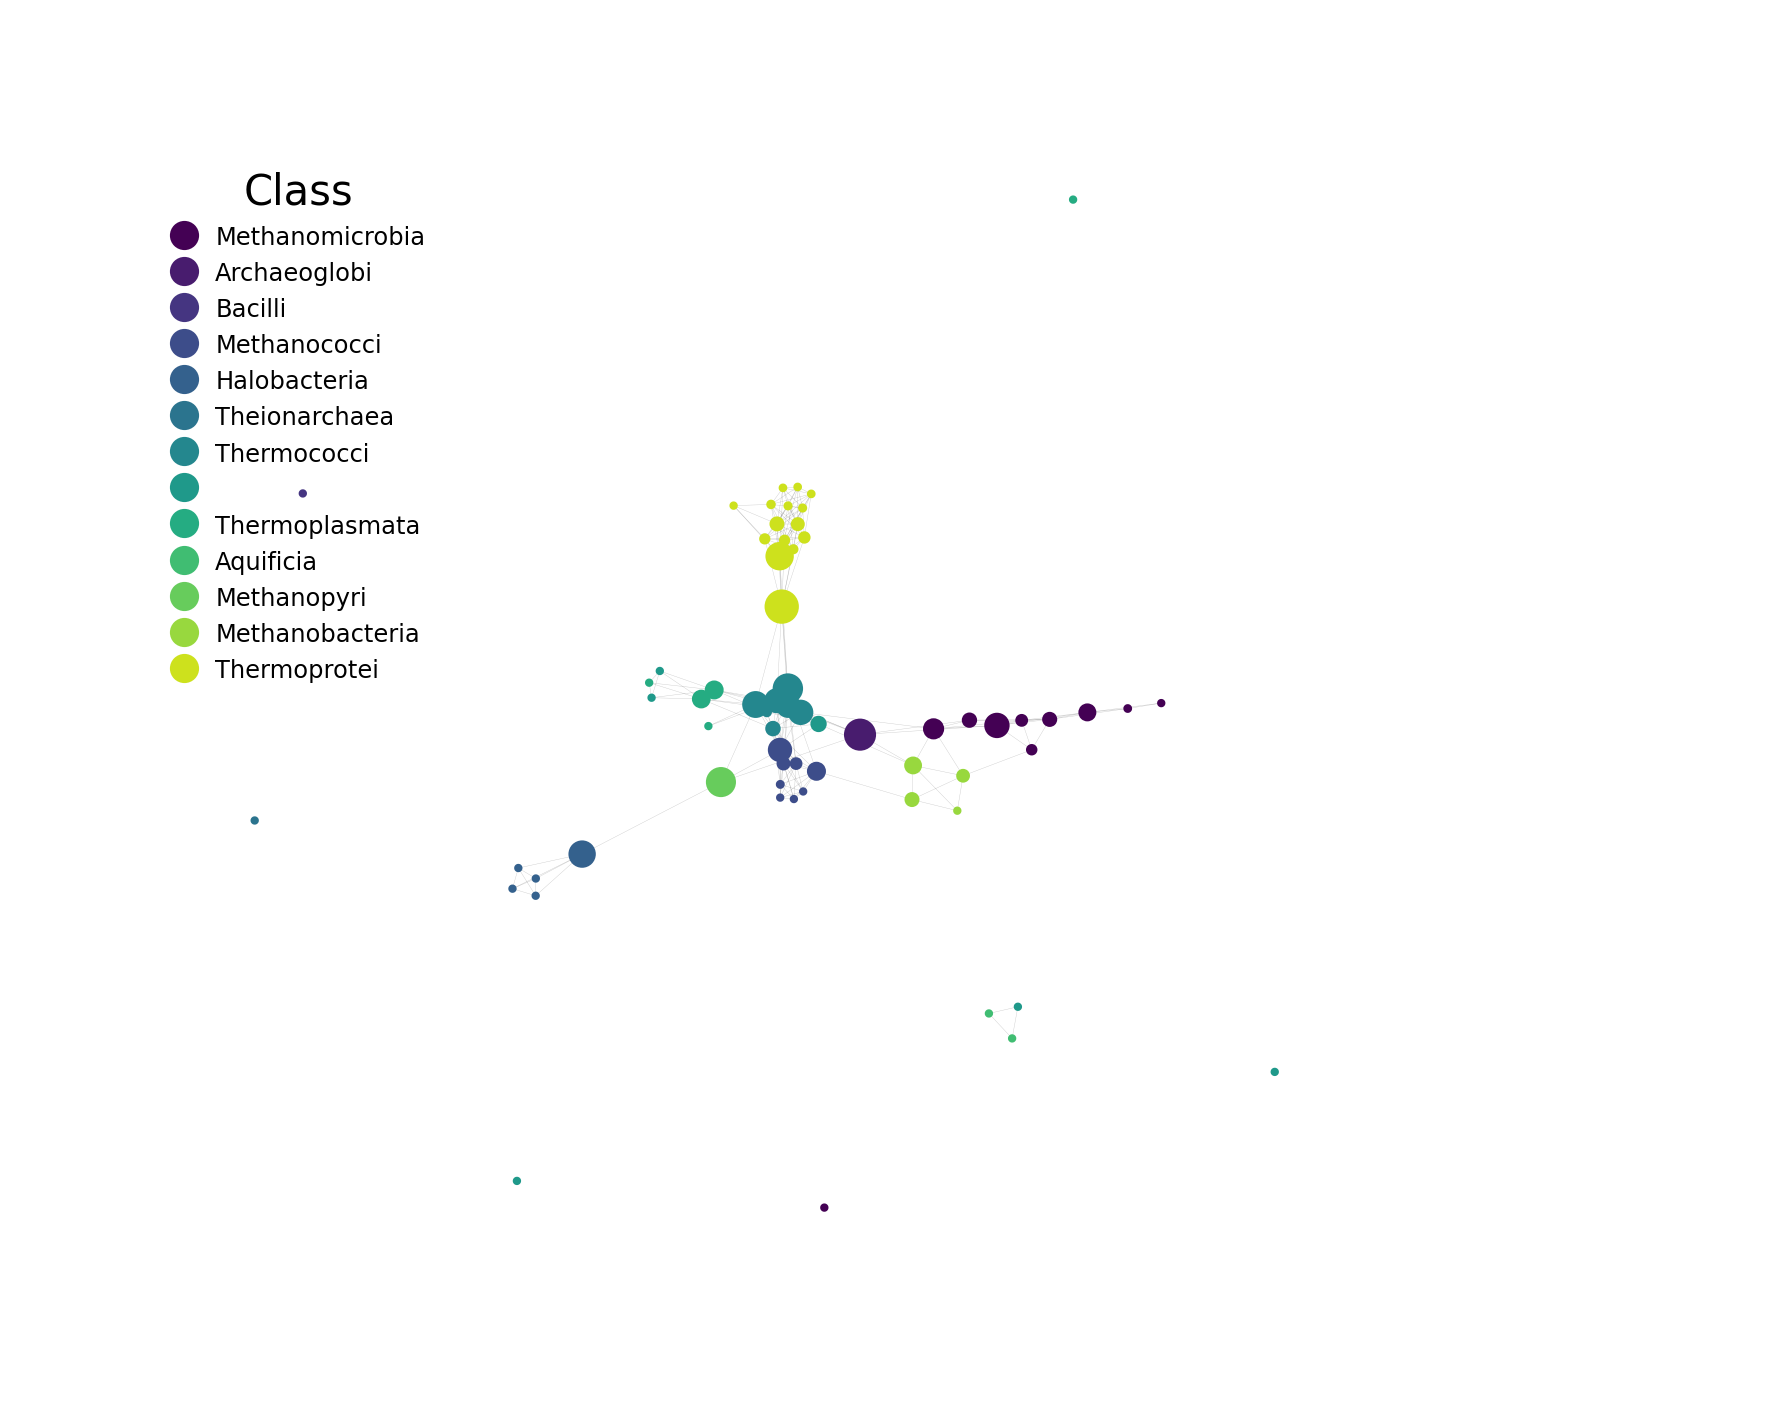

In [4]:
graph.update_threshhold(0.45)
graph.calculate_centrality("betweenness")
graph.visualize(
    size=True,
    color="class",
)

Furthermore, the network can be visualized by using [`cytoscape`](https://cytoscape.org/). With a pre-installed cytoscape instance, all sequence data and annotations can be exported to a file by using the `export_cytoscape_graph()` method.  

Alternatively to the graphical user interface, the cytoscape application can be controlled programmatically using the [`py4cytoscape` library](https://py4cytoscape.readthedocs.io/en/0.0.9/tutorials/Overview-of-py4cytoscape.html). In this way, the visualization can be controlled and adjusted from the Jupyter Notebook

You are connected to Cytoscape!
You are connected to Cytoscape!
Applying default style...
Applying preferred layout


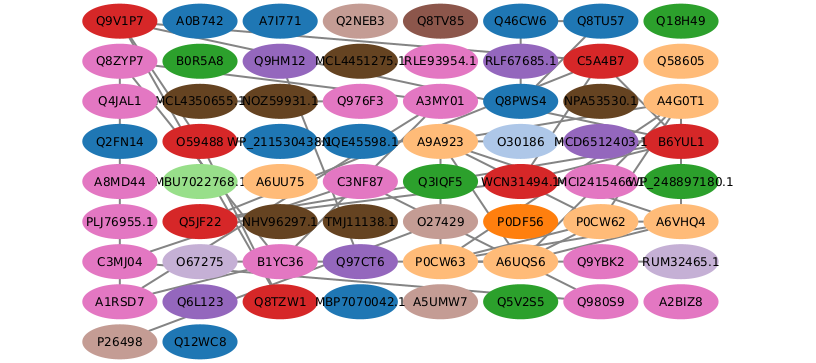

In [7]:
import py4cytoscape as p4c

# transfer the network to cytoscape
graph.create_cytoscape_graph(
    threshold=0.75,
    column_name="class",
)

# plot the network
p4c.notebook_export_show_image()